## Canada Immigration
#### Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [46]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


How many coutries do we have in our dataset?

In [3]:
df_can.shape[0]

195

Setting the Country names to to index for easy traversing:

In [4]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Creating list of years for easier plotting:

In [5]:
years = list(map(str, range(1980, 2014)))

### Pie Charts

Let's summarize the data by contintent:

In [7]:
# returns groupby object, countries grouped by continent
# sum adds those countries up and returns a df
df_cont = df_can.groupby('Continent', axis=0).sum(numeric_only=True)
df_cont.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Plotting our pie chart:

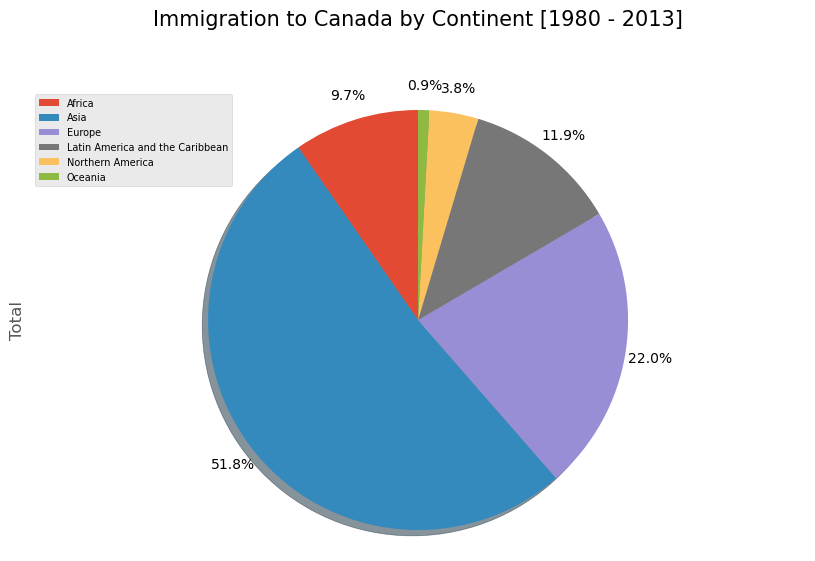

In [15]:
df_cont['Total'].plot(kind='pie',
                      figsize=(10, 6),
                      autopct='%1.1f%%', # function or format string, used label wedges
                      startangle=90, # rotates start counterclocwise
                      shadow=True, # 3d look
                      labels=None, # removes name labels
                      pctdistance=1.12) # ratio between the center slice and label

plt.title('Immigration to Canada by Continent [1980 - 2013]',
          y=1.12, # scaling up by 12% to match pctdistance
          fontsize=15) 
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_cont.index, loc='upper left', fontsize=7) 


plt.show()

#### What are the proportions of new immigrants grouped by continents in the year 2013?

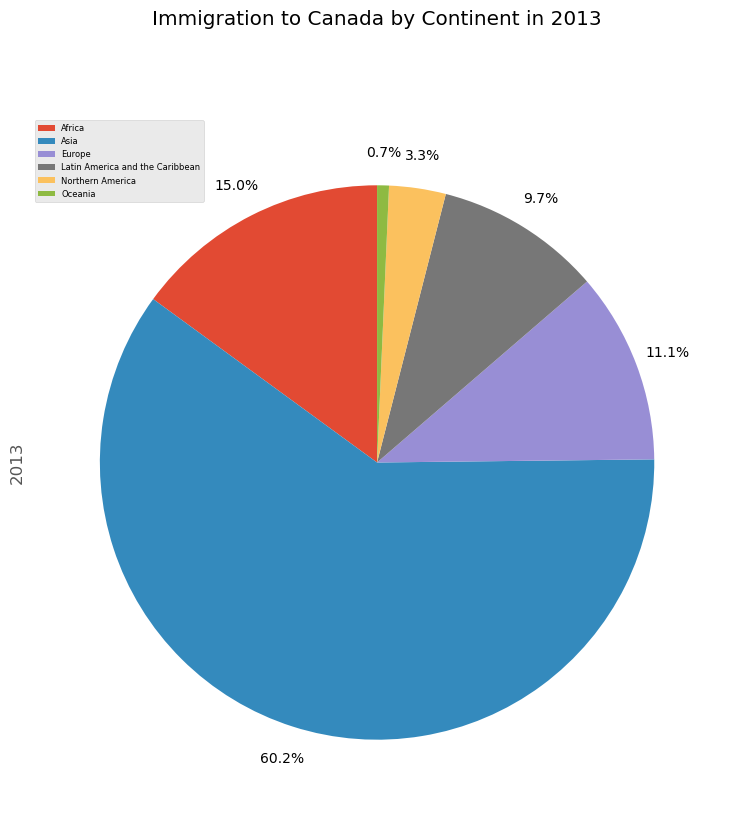

In [37]:
df_cont['2013'].plot(kind='pie',
                    figsize=(10,9),
                    autopct='%1.1f%%',
                    startangle=90,
                    labels=None,
                    pctdistance=1.12)
plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis=('equal')
plt.legend(labels=df_cont.index, loc='upper left', fontsize=6)

plt.show()

### Box Plots

What's the distribution look like for Japanese Immigrants between 1980 - 2013?

In [39]:
df_jap = df_can.loc[['Japan'], years].transpose()
df_jap.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


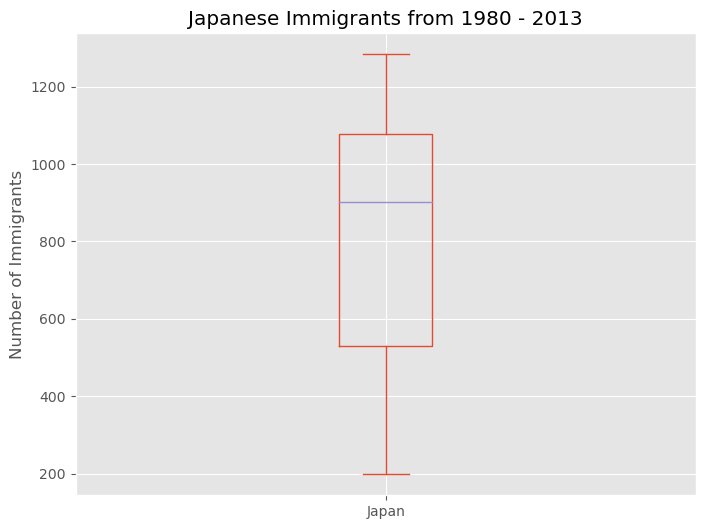

In [41]:
df_jap.plot(kind='box',
             figsize=(8, 6))
plt.title('Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Observations:
- Min: 200 approx.
- Max: 1300 approx.
- Median: 900 approx.
- First Quartile: 25% of the years had an annual immigrant count of 500 or less
- Third Quartile: 75% of the years had an annual immigrant count of 1100 or fewer.


#### How does the distributions compare between India and China for the same years? (1980-2013)

In [43]:
df_cl = df_can.loc[['China','India'], years].transpose()
df_cl.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


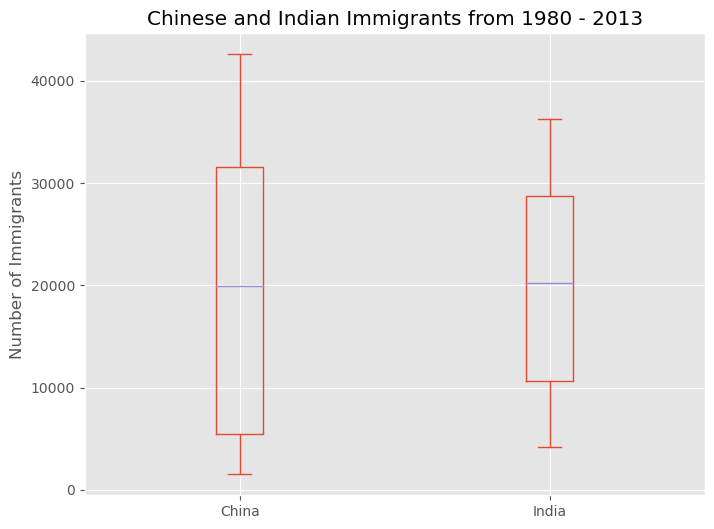

In [45]:
df_cl.plot(kind='box', figsize=(8, 6))

plt.title('Chinese and Indian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Let's analyze this along side a line plot:

Text(0, 0.5, 'Number of Immigrants')

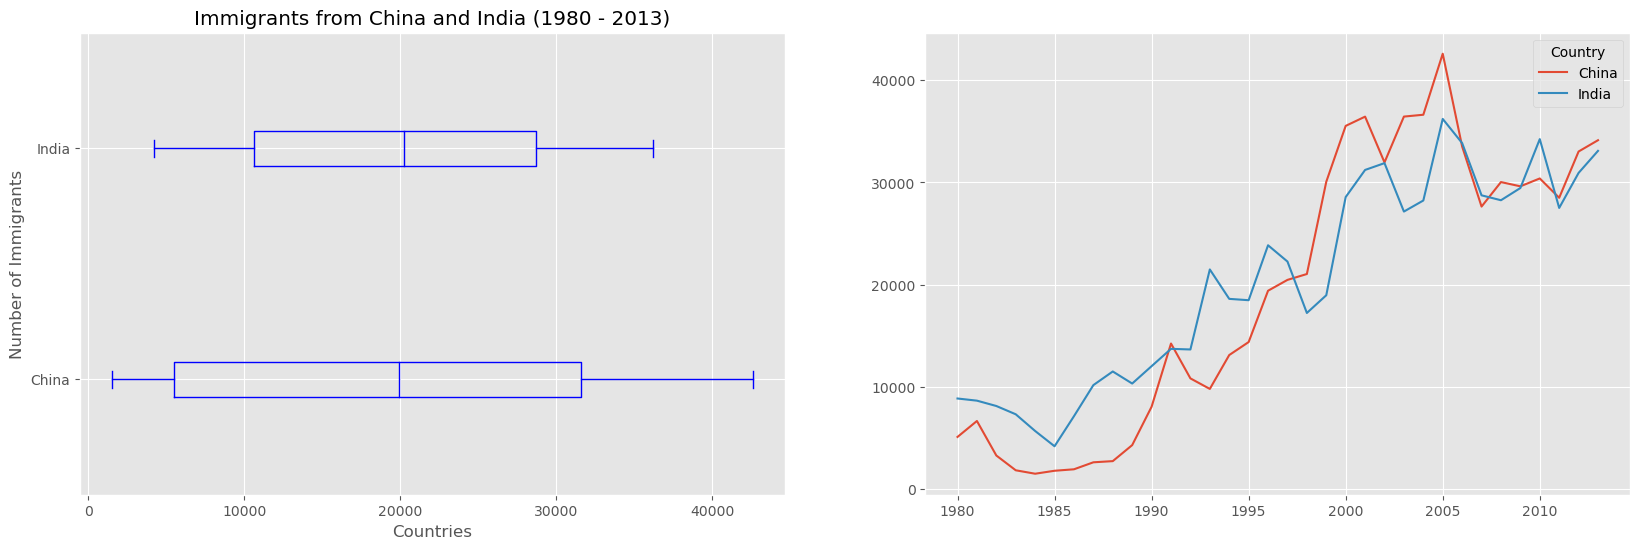

In [47]:
# for subplots we typically work with the Artist layer
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1) #add subplot 1 (1 row, 2 cols, 1st plot)
ax1 = fig.add_subplot(1,2,2) #add subplot 1 (1 row, 2 cols, 2nd plot)

# box plot
df_cl.plot(kind='box', color='blue',
           vert=False, figsize=(20,6),
           ax=ax0) # add to subplot 1
ax0.set_title('Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')
# line plot

df_cl.plot(kind='line', figsize=(20,6),
           ax=ax1) # add to subplot 1
ax0.set_title('Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Countries')
ax0.set_ylabel('Number of Immigrants')


### What does the distribution look like for across decades for the top 15 countries?

In [68]:
df_can.sort_values(by='Total', ascending=False, inplace=True)
df_top15 = df_can[years].head(15).transpose()

In [69]:
# creating list of years in each decade
decade_80s = list(map(str, range(1980, 1990)))
decade_90s = list(map(str, range(1990, 2000)))
decade_00s = list(map(str, range(2000, 2010)))
# getting sum of all years in decade per country
top15_80s = df_top15.loc[decade_80s].sum()
top15_90s = df_top15.loc[decade_90s].sum()
top15_00s = df_top15.loc[decade_00s].sum()
# creating new dataframe with decades and countries
top15_by_decades_df = pd.DataFrame({'1980s':top15_80s,
                                   '1990s':top15_90s,
                                   '2000s':top15_00s})
top15_by_decades_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


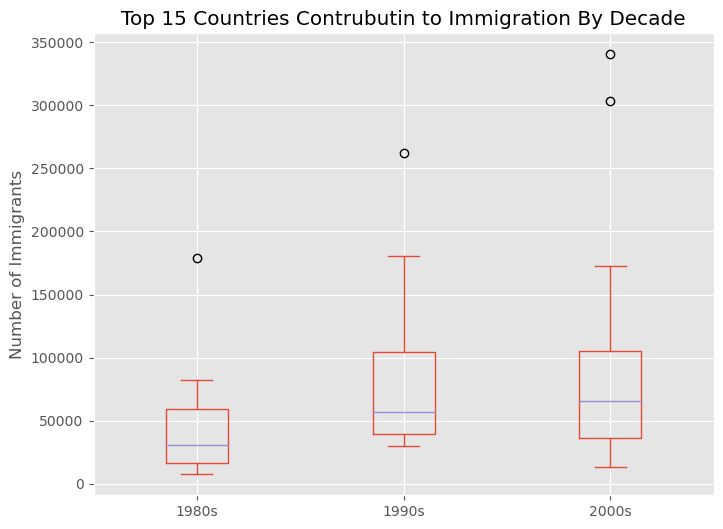

In [70]:
top15_by_decades_df.plot(kind='box', figsize=(8, 6))

plt.title('Top 15 Countries Contrubutin to Immigration By Decade')
plt.ylabel('Number of Immigrants')

plt.show()

## Scatter Plots

Let's visualize the trends of __total__ immigration to Canada for years 1980-2013:

In [77]:
# getting sum of immigration per year
df_total = pd.DataFrame(df_can[years].sum())
# converting index from string to int, for examining the relationship later(regression)
df_total.index = map(int, df_total.index)
# setting index from years to index numeric values
df_total.reset_index(inplace=True)
# setting col names
df_total.columns=['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


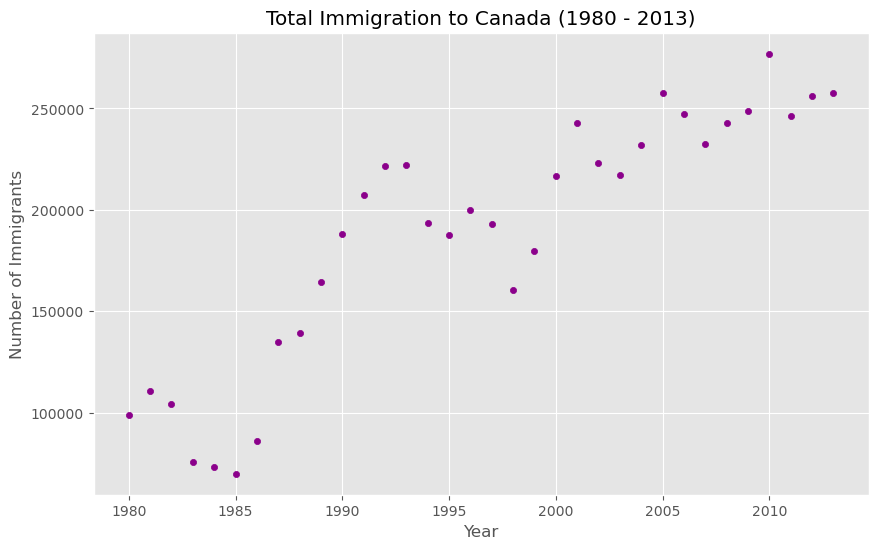

In [81]:
df_total.plot(kind='scatter', 
              x='year', y='total', figsize=(10,6), color='darkmagenta')

plt.title('Total Immigration to Canada (1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

#### Now, let's use try find the line of best fit:

In [82]:
x = df_total['year']
y = df_total['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

Plotting the line of best fit:

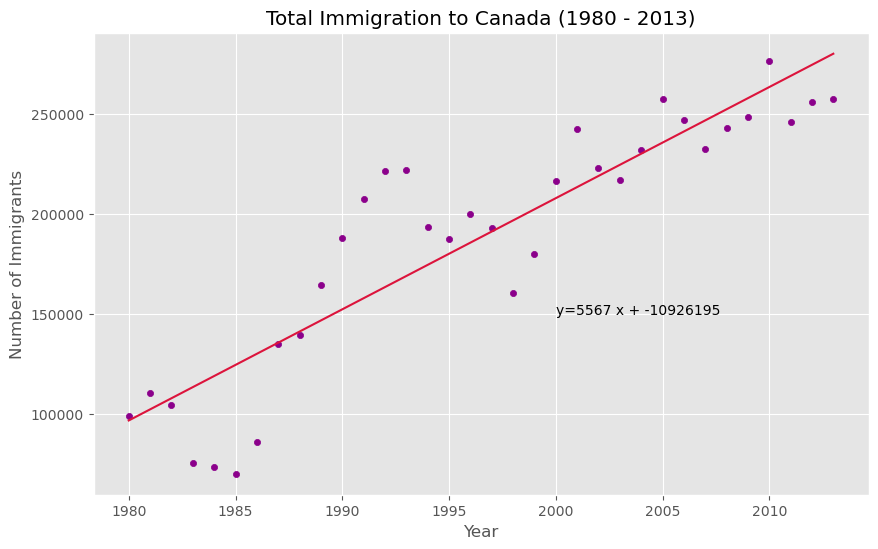

In [84]:
df_total.plot(kind='scatter', 
              x='year', y='total', figsize=(10,6), color='darkmagenta')

plt.title('Total Immigration to Canada (1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# plot line 
plt.plot(x, fit[0] * x + fit[1], color='crimson')
# annotate line
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0],fit[1]), xy=(2000,150000))

plt.show()

Can we predict immigration numbers for 2015?

In [95]:
print('# of Immigrants = ',fit[0].round() * 2015 + fit[1].round() )

# of Immigrants =  291310.0


Actual value from Canada's 2016 annual report: 271,845

This means our model is only 7% off from target.

#### Let's look at the total immigration from Denmark, Norway, and Sweden from 1980 - 2013.

In [102]:
df_dns = df_can.loc[['Denmark','Norway','Sweden'], years].transpose()
df_dns_tot = pd.DataFrame(df_dns.sum(axis=1))
df_dns_tot.reset_index(inplace=True)
df_dns_tot.columns=['year','total']
df_dns_tot['year'] = df_dns_tot['year'].astype(int)
df_dns_tot.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Creating scatter plot:

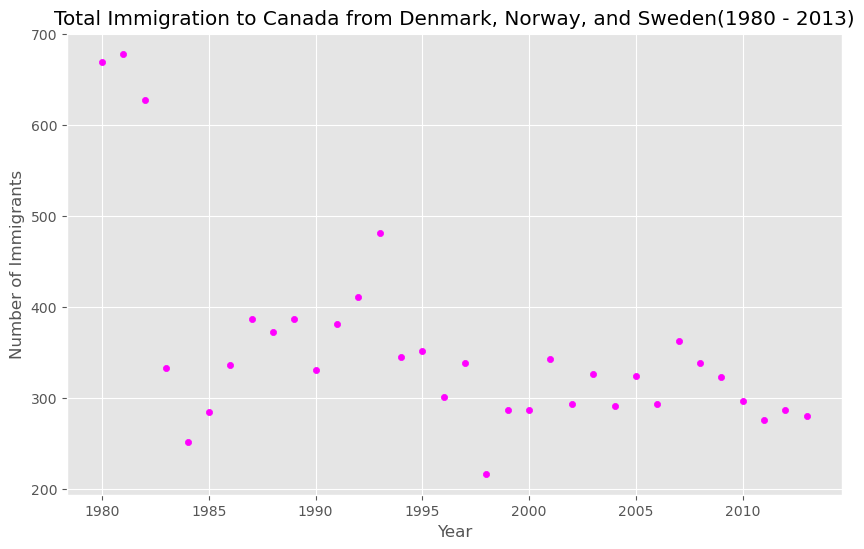

In [103]:
df_dns_tot.plot(kind='scatter', 
                x='year',
                y='total',
               figsize=(10,6),
               color='magenta')
plt.title('Total Immigration to Canada from Denmark, Norway, and Sweden(1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

## Bubble Plots

Argentina suffered a great depression from 1998 to 2002. Let's look at the effects this had on immigration by comparing Argentina's and Brazil's immigration trends into Canada.

In [108]:
df_can_t = df_can[years].transpose()
# covert years into integers
df_can_t.index = map(int, df_can_t.index)
# naming index
df_can_t.index.name = 'Year'
# bring Year into columns
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Using feature scaling to normalize data:

In [109]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Plotting our data:

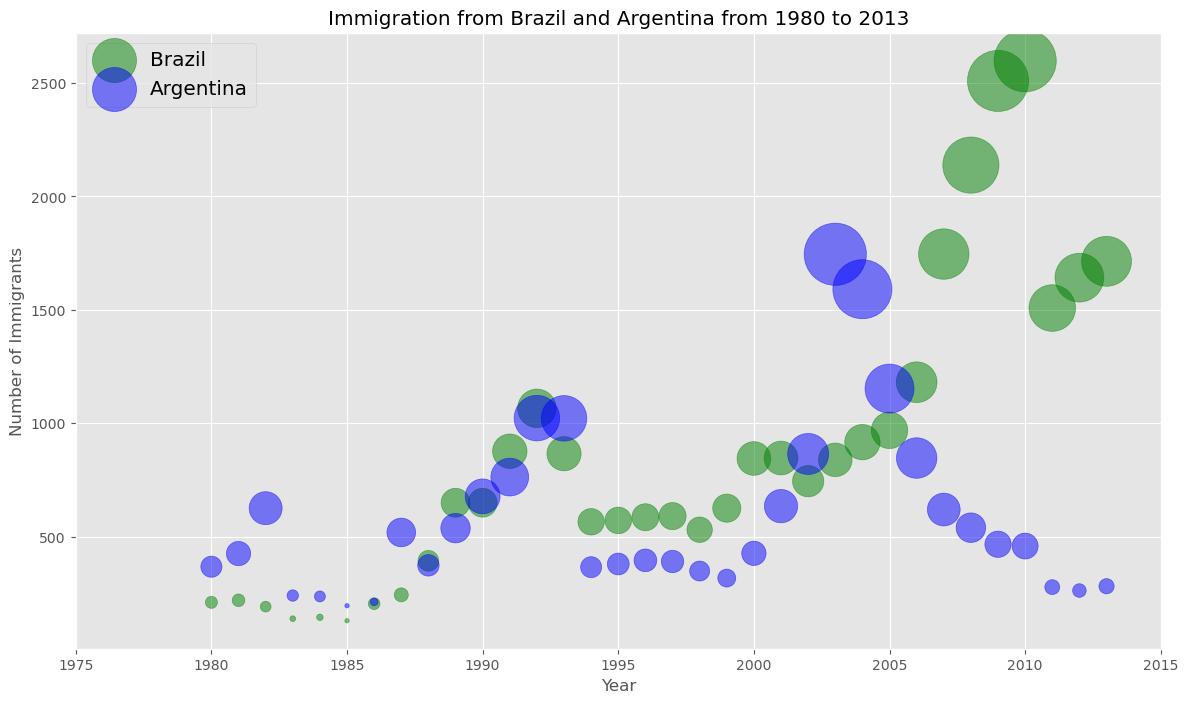

In [110]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')